In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize

#quick clean up for html https://monkeybeanonline.com/quickly-clean-up-citations-from-wikipedia-table-with-pandas/ 
school_shootings_USA_lists = pd.read_html('List of school shootings in the United States - Wikipedia.html')


In [69]:
"""Data inspection"""

[display(df.info()) for df in school_shootings_USA_lists]
display(school_shootings_USA_lists[0].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         68 non-null     object
 1   Location     68 non-null     object
 2   Deaths       68 non-null     int64 
 3   Injuries     68 non-null     int64 
 4   Description  68 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         226 non-null    object
 1   Location     226 non-null    object
 2   Deaths       226 non-null    int64 
 3   Injuries     226 non-null    int64 
 4   Description  226 non-null    object
dtypes: int64(2), object(3)
memory usage: 9.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         40 non-null     object
 1   Location     40 non-null     object
 2   Deaths       40 non-null     int64 
 3   Injuries     40 non-null     int64 
 4   Description  40 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.7+ KB


None

,Date,Location,Deaths,Injuries,Description
0,"February 29, 2000","Flint, Michigan",1,0,Shooting of Kayla Rolland: At Buell Elementary...
1,"May 26, 2000","Lake Worth, Florida",1,0,"13-year-old honor student, Nathaniel Brazill w..."
2,"June 28, 2000","Seattle, Washington",2,0,58-year-old Director of the Division of Pathol...
3,"August 28, 2000","Fayetteville, Arkansas",2,0,"36-year-old James Easton Kelly, a PhD candidat..."
4,"September 26, 2000","New Orleans, Louisiana",0,2,13 year-olds Darrel Johnson and Alfred Anderso...


In [70]:
#merge DataFrames
df_school_shootings_USA = pd.concat(school_shootings_USA_lists, ignore_index=True)

In [71]:
#convert Date to datetime
df_school_shootings_USA['Date'] = pd.to_datetime(df_school_shootings_USA['Date'])

In [72]:
#Description column won't be used so we discard it
df_school_shootings_USA = df_school_shootings_USA.drop(['Description'], axis=1)

In [73]:
#ok, data is ready to go! 
display(df_school_shootings_USA.head())
df_school_shootings_USA.info()

,Date,Location,Deaths,Injuries
0,2000-02-29,"Flint, Michigan",1,0
1,2000-05-26,"Lake Worth, Florida",1,0
2,2000-06-28,"Seattle, Washington",2,0
3,2000-08-28,"Fayetteville, Arkansas",2,0
4,2000-09-26,"New Orleans, Louisiana",0,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      334 non-null    datetime64[ns]
 1   Location  334 non-null    object        
 2   Deaths    334 non-null    int64         
 3   Injuries  334 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 10.6+ KB


In [74]:
#Let's create some more columns
df_school_shootings_USA['State'] = list(map(lambda x: x.split(',')[1].strip() if "," in x else None, df_school_shootings_USA['Location']))
df_school_shootings_USA['City'] = list(map(lambda x: x.split(',')[0].strip() if "," in x else None, df_school_shootings_USA['Location']))

In [75]:
#it looks like all our locations were ok, let's continue
df_school_shootings_USA.isna().sum()

Date        0
Location    0
Deaths      0
Injuries    0
State       0
City        0
dtype: int64

In [76]:
#Location column won't be used anymore
df_school_shootings_USA = df_school_shootings_USA.drop(['Location'], axis=1)
df_school_shootings_USA.head()

,Date,Deaths,Injuries,State,City
0,2000-02-29,1,0,Michigan,Flint
1,2000-05-26,1,0,Florida,Lake Worth
2,2000-06-28,2,0,Washington,Seattle
3,2000-08-28,2,0,Arkansas,Fayetteville
4,2000-09-26,0,2,Louisiana,New Orleans


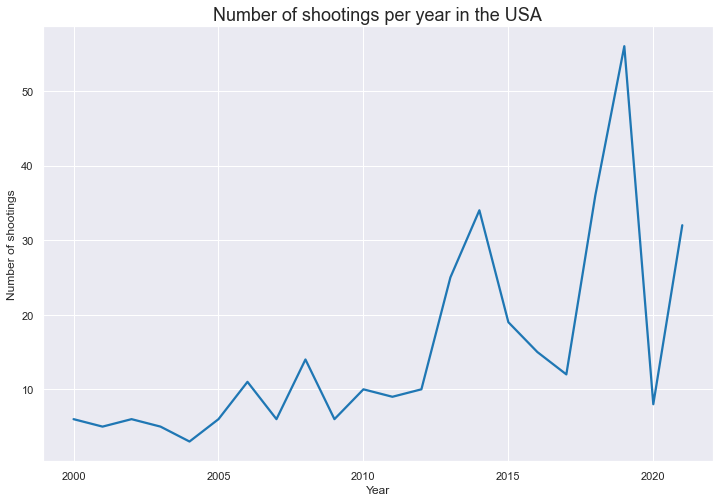

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))

sns.set_style('darkgrid')
sns.set_context('talk')

shootings_per_year = df_school_shootings_USA.groupby(df_school_shootings_USA.Date.dt.year)[['Date']].count().rename({'Date': 'Count'}, axis=1).sort_values(by='Count', ascending=False).reset_index().rename({'Date': 'Year'}, axis=1)
sns.lineplot(data=shootings_per_year, x='Year', y='Count')
ax.set(xlabel='Year', ylabel='Number of shootings', title='Number of shootings per year in the USA')
plt.show()

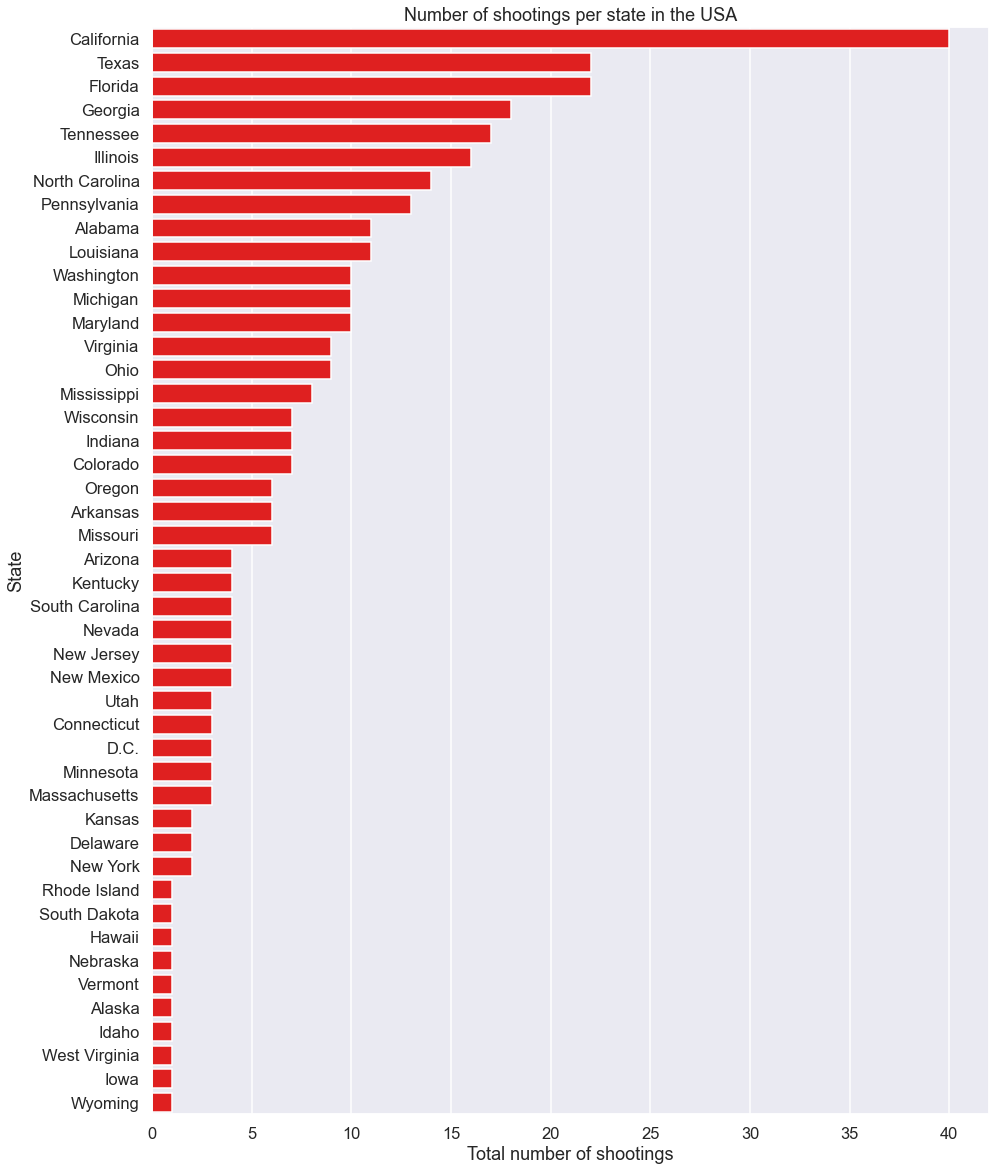

In [81]:

fig, ax = plt.subplots(figsize=(15, 20))
shootings_per_state = df_school_shootings_USA.groupby('State')[['State']].count().rename({'State': 'Count'}, axis=1).sort_values(by='Count', ascending=False).reset_index()
sns.barplot(x='Count', y='State', data=shootings_per_state, color='r')
ax.set(xlabel='Total number of shootings', ylabel='State', title='Number of shootings per state in the USA')
plt.show()

C:\Users\mario\AppData\Local\Temp/ipykernel_18872/3610105226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_4_school_shootings['Year'] = top_4_school_shootings['Date'].dt.year


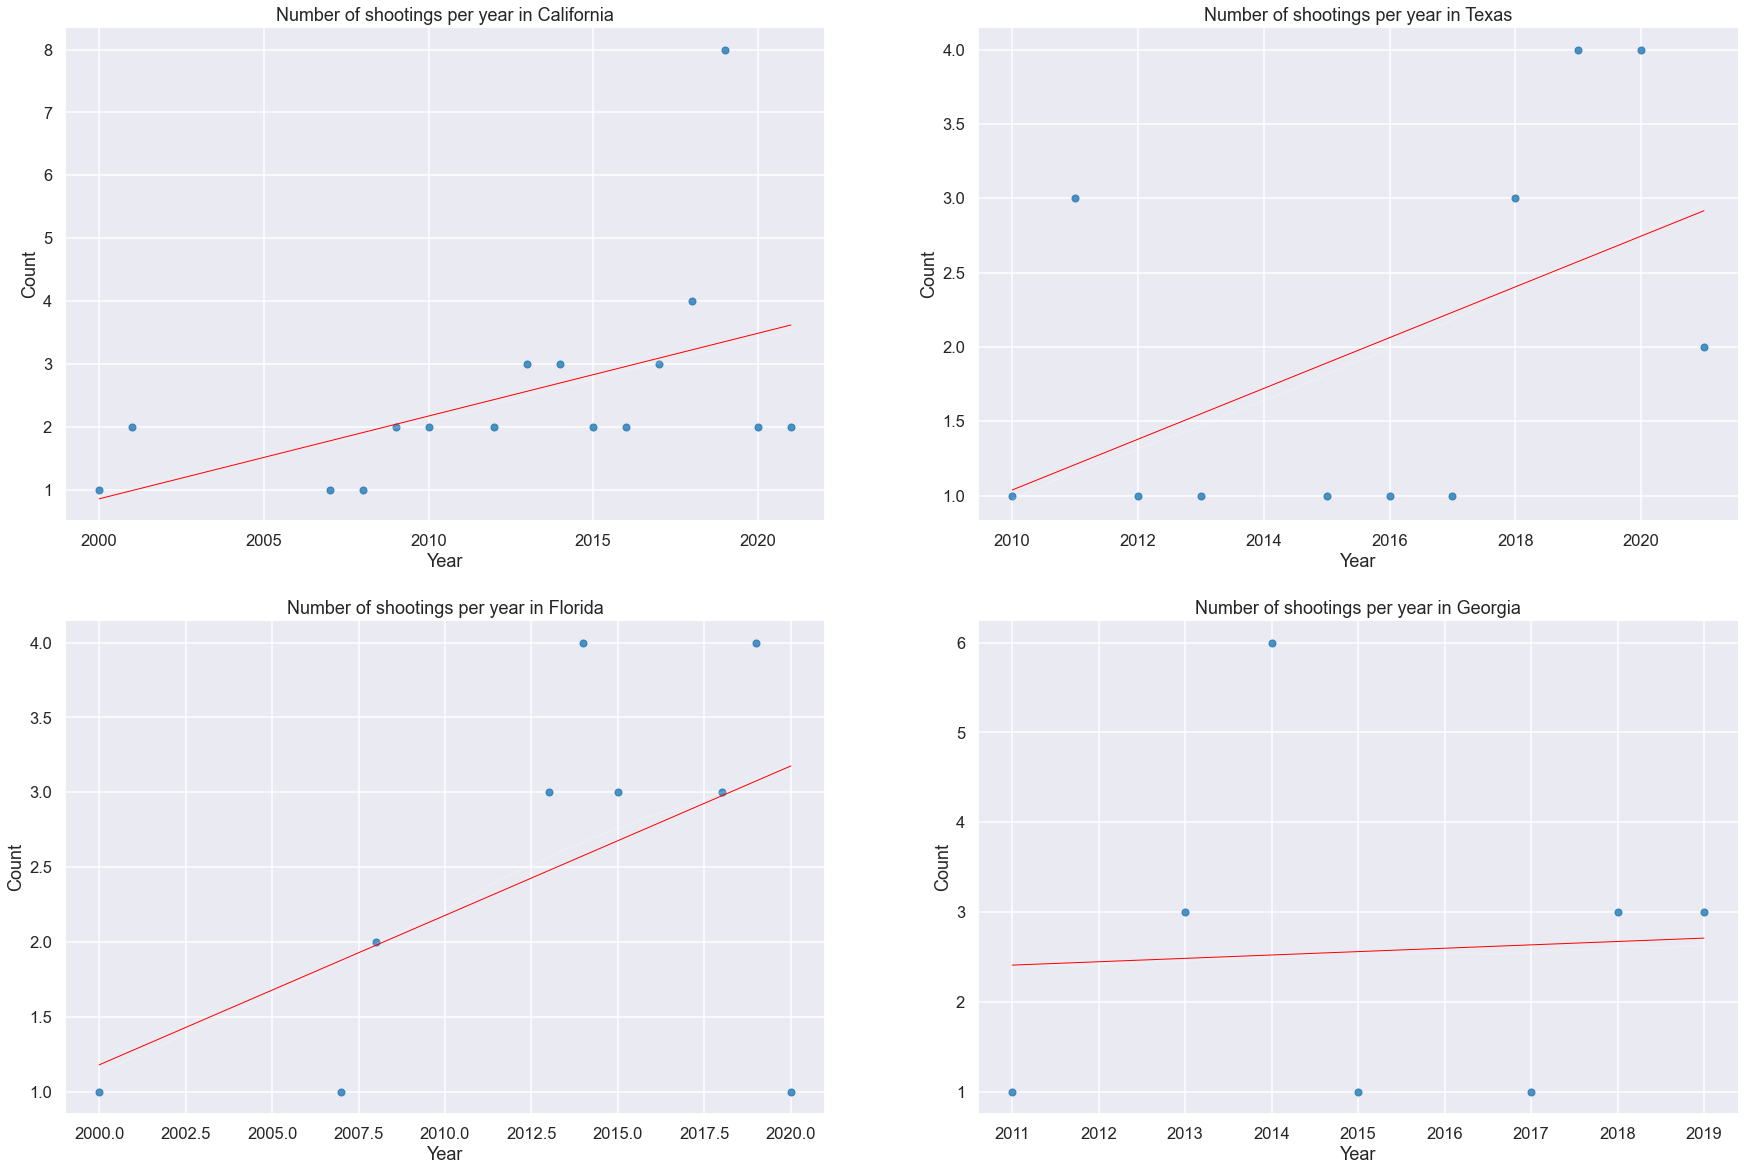

In [92]:
top_4_school_shootings_states = shootings_per_state.nlargest(4, 'Count')['State']
top_4_school_shootings = df_school_shootings_USA[df_school_shootings_USA['State'].isin(top_4_school_shootings_states)]

top_4_school_shootings['Year'] = top_4_school_shootings['Date'].dt.year
top_4_school_shootings_per_year = top_4_school_shootings.groupby(['State', 'Year'])[['State']].count().rename({'State': 'Count'}, axis=1).sort_values(by='Count', ascending=False).reset_index()

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(30, 20))
sns.set_style('darkgrid')
sns.set_context('talk')
ax[0,0].set(title='Number of shootings per year in ' + top_4_school_shootings_states[0])
ax[0,1].set(title='Number of shootings per year in ' + top_4_school_shootings_states[1])
ax[1,0].set(title='Number of shootings per year in ' + top_4_school_shootings_states[2])
ax[1,1].set(title='Number of shootings per year in ' + top_4_school_shootings_states[3])

#let's make linear regression to see if there is a correlation between the number of shootings and the year
sns.regplot(x='Year', y='Count', data=top_4_school_shootings_per_year.loc[top_4_school_shootings_per_year['State'] == top_4_school_shootings_states[0]], ax = ax[0,0], fit_reg=True, scatter_kws={"s": 50}, line_kws={"color": "red", "lw": 1}, ci=False)
sns.regplot(x='Year', y='Count', data=top_4_school_shootings_per_year.loc[top_4_school_shootings_per_year['State'] == top_4_school_shootings_states[1]], ax = ax[0,1], fit_reg=True, scatter_kws={"s": 50}, line_kws={"color": "red", "lw": 1}, ci=False)
sns.regplot(x='Year', y='Count', data=top_4_school_shootings_per_year.loc[top_4_school_shootings_per_year['State'] == top_4_school_shootings_states[2]], ax = ax[1,0], fit_reg=True, scatter_kws={"s": 50}, line_kws={"color": "red", "lw": 1}, ci=False)
sns.regplot(x='Year', y='Count', data=top_4_school_shootings_per_year.loc[top_4_school_shootings_per_year['State'] == top_4_school_shootings_states[3]], ax = ax[1,1], fit_reg=True, scatter_kws={"s": 50}, line_kws={"color": "red", "lw": 1}, ci=False)

plt.show()



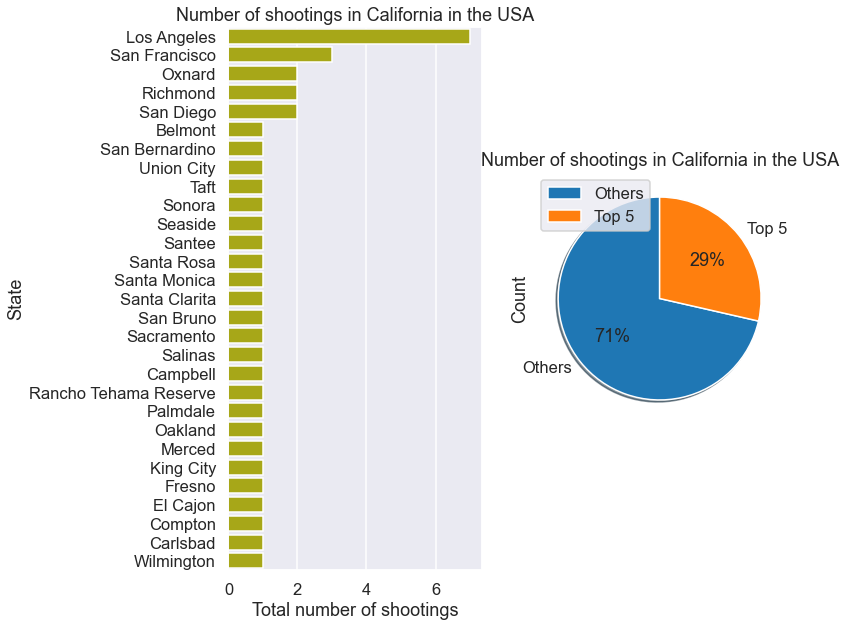

In [80]:

shootings_in_california = df_school_shootings_USA[df_school_shootings_USA['State'] == 'California']
shootings_in_california_cities = shootings_in_california.groupby('City')[['City']].count().rename({'City': 'Count'}, axis=1).sort_values(by='Count', ascending=False).reset_index()

#-----------------------------------------------------------------------------------------------------------------------
fig, (ax, ax1) = plt.subplots(figsize=(10, 10), ncols=2)
sns.barplot(x='Count', y='City', data=shootings_in_california_cities, color='y', ax = ax)
ax.set(xlabel='Total number of shootings', ylabel='State', title='Number of shootings in California in the USA')

#-----------------------------------------------------------------------------------------------------------------------
top_5_shootings_in_california_cities = shootings_in_california_cities.nlargest(5, 'Count')
california_cities_not_in_top_5 = shootings_in_california_cities[~shootings_in_california_cities['City'].isin(top_5_shootings_in_california_cities.index)]['Count'].sum()
top_5_shootings_in_california_cities = top_5_shootings_in_california_cities['Count'].sum()

others = {'City': 'Others',
          'Count': california_cities_not_in_top_5
         }
Top5 = {'City': 'Top 5',
          'Count': top_5_shootings_in_california_cities
         }
ex_df = pd.DataFrame([others, Top5])
ex_df.set_index('City', inplace=True)

ex_df.plot.pie(y='Count', autopct='%1.0f%%', shadow = True, startangle=90, ax = ax1)
ax1.set(title='Number of shootings in California in the USA')

plt.show()